In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Dataset

In [2]:
#read dataset
data = pd.read_excel(r"patient_dataset.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             6000 non-null   object 
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   bmi                6000 non-null   float64
 8   diabetes_pedigree  6000 non-null   float64
 9   hypertension       6000 non-null   int64  
 10  heart_disease      6000 non-null   int64  
 11  smoking_status     6000 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 562.6+ KB


Dataset has 12 features, all describe the patient with respect to pressence of heart disease

In [3]:
#display first 5 rows
data.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status
0,24,M,4,250,139,212,0,37.999303,0.480277,1,1,Smoker
1,29,F,4,132,187,147,0,25.588346,0.283986,1,1,Unknown
2,46,F,3,271,185,193,0,37.892029,2.472309,1,0,Non-Smoker
3,73,M,2,102,200,125,0,18.660241,1.472052,0,1,Smoker
4,49,M,3,91,163,192,0,12.767980,0.537627,1,1,Smoker


Preprocesing Data

<ol>
<li>Perform One Hot Encoding on categorical columns</li></ol>

In [4]:
#perform One Hot Encoding on categorical columns, dropping the first category to avoid multicollinearity
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(data[['gender', 'smoking_status']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'smoking_status']))
data_encoded = pd.concat([data.drop(['gender', 'smoking_status'], axis=1), encoded_df], axis=1)
data_encoded.head()

,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,bmi,diabetes_pedigree,hypertension,heart_disease,gender_M,smoking_status_Smoker,smoking_status_Unknown
0,24,4,250,139,212,0,37.999303,0.480277,1,1,1.0,1.0,0.0
1,29,4,132,187,147,0,25.588346,0.283986,1,1,0.0,0.0,1.0
2,46,3,271,185,193,0,37.892029,2.472309,1,0,0.0,0.0,0.0
3,73,2,102,200,125,0,18.660241,1.472052,0,1,1.0,1.0,0.0
4,49,3,91,163,192,0,12.767980,0.537627,1,1,1.0,1.0,0.0


### KMeans Clustering

This cell applies KMeans clustering to the preprocessed dataset (`data_encoded`). The KMeans algorithm is fitted with 3 clusters, and the resulting cluster labels are added as a new column (`cluster`) to the dataframe. The updated dataframe with cluster assignments is displayed.

In [5]:
from sklearn.cluster import KMeans

X = data_encoded

# Fit KMeans with 3 clusters (you can change n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
data_encoded['cluster'] = clusters

data_encoded.head()

,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,bmi,diabetes_pedigree,hypertension,heart_disease,gender_M,smoking_status_Smoker,smoking_status_Unknown,cluster
0,24,4,250,139,212,0,37.999303,0.480277,1,1,1.0,1.0,0.0,0
1,29,4,132,187,147,0,25.588346,0.283986,1,1,0.0,0.0,1.0,1
2,46,3,271,185,193,0,37.892029,2.472309,1,0,0.0,0.0,0.0,0
3,73,2,102,200,125,0,18.660241,1.472052,0,1,1.0,1.0,0.0,1
4,49,3,91,163,192,0,12.767980,0.537627,1,1,1.0,1.0,0.0,1


### Elbow Method for Optimal Number of Clusters

This cell calculates and visualizes the inertia (sum of squared distances to the nearest cluster center) for different values of `k` (number of clusters) using the KMeans algorithm. The inertia values are plotted against the number of clusters to help identify the "elbow point," which suggests the optimal number of clusters for KMeans clustering on the dataset.

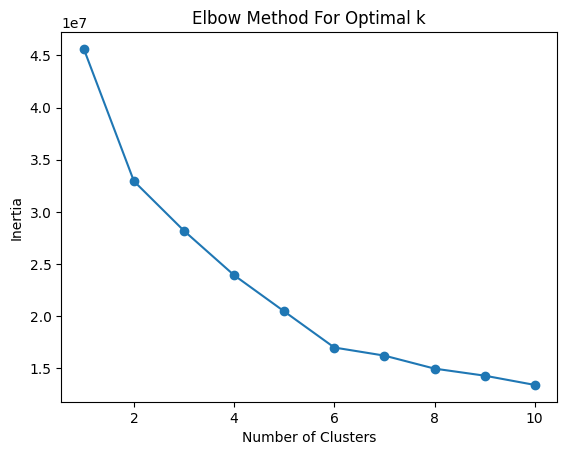

In [6]:
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Feature Selection for Clustering

To properly visualize the clustering, selects a subset of features (`cholesterol`, `bmi`, and `blood_pressure`) from the preprocessed dataset (`data_encoded`) to perform clustering. It fits the KMeans algorithm with 3 clusters to the selected features and assigns the resulting cluster labels to a new column (`cluster`).

In [7]:
# Select features for clustering (excluding target variable 'heart_disease')
X_sub = data_encoded[['cholesterol', 'bmi',	'blood_pressure']]

# Fit KMeans with 3 clusters (you can change n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
X_sub['cluster'] = clusters

X_sub.head()

C:\Users\vicky\AppData\Local\Temp\ipykernel_29640\474227209.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sub['cluster'] = clusters


,cholesterol,bmi,blood_pressure,cluster
0,139,37.999303,250,0
1,187,25.588346,132,1
2,185,37.892029,271,0
3,200,18.660241,102,1
4,163,12.767980,91,1


### Visualization of Subset Dataset Clusters

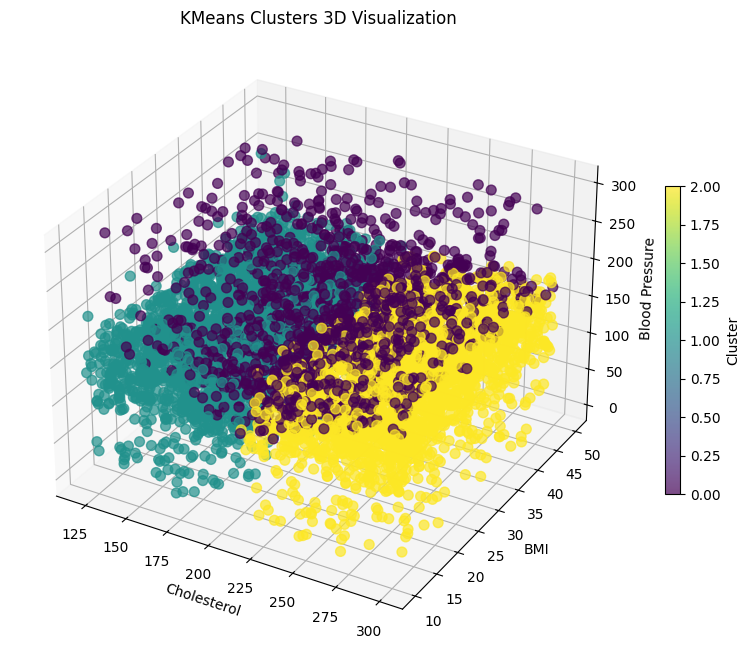

In [8]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_sub['cholesterol'], X_sub['bmi'], X_sub['blood_pressure'], 
                    c=X_sub['cluster'], cmap='viridis', alpha=0.7, s=50)

ax.set_xlabel('Cholesterol')
ax.set_ylabel('BMI')
ax.set_zlabel('Blood Pressure')
ax.set_title('KMeans Clusters 3D Visualization')

# Add colorbar legend
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20, label='Cluster')

plt.show()